In [8]:
import pandas as pd
import pickle as pkl
import torch
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# get model definitions with best stopping point
training_files = glob.glob('/Volumes/Samsung_T5/aoLab/Data/models/pyt/seq2seq/enc30_dec30_nl1_nep500_hps_20200708180739/hid2048*/training_progress.pt')

63
70
273


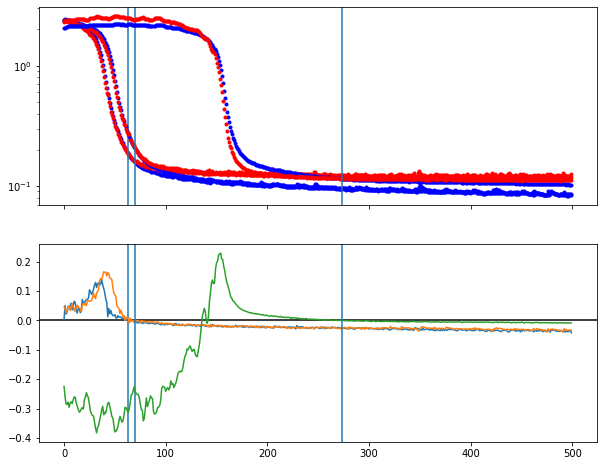

In [49]:
# plot the training progress, get the best model
f,ax = plt.subplots(2,1,figsize=(10,8),sharex=True)
ax[1].axhline(0,color='k')
opt_test_loss = np.zeros((len(training_files)))
for idx, training_file in enumerate(training_files):
    # find best stopping point
    training_data = torch.load(training_file)
    n_epochs = len(training_data['train_loss'])
    loss_delta = training_data['train_loss']-training_data['test_loss']
    change_point_idx = np.where(np.diff(np.sign(loss_delta)) < 0)[0]
    # plot the loss curves with the change point
    ax[0].plot(np.arange(n_epochs),training_data['train_loss'],'b.')
    ax[0].plot(np.arange(n_epochs),training_data['test_loss'],'r.')
    ax[0].axvline(change_point_idx[-1])
    ax[0].set_yscale('log')
    ax[1].plot(np.arange(n_epochs),training_data['train_loss']-training_data['test_loss'])
    ax[1].axvline(change_point_idx[-1])
    print(change_point_idx[-1])
    opt_test_loss[idx] = training_data['test_loss'][change_point_idx[-1]]
    # load the nearest model
    best_model_idx = int(np.round(change_point_idx[-1]/10)*10)
    model_path = os.path.dirname(training_file)
    model_str = os.path.basename(model_path)
    os.system('gcloud compute scp --recurse --project "balmy-mile-266619" --zone "us-west1-b" "instance-1:/home/mickey/models/pyt/seq2seq/enc30_dec30_nl1_nep500_hps_20200708180739/{}/example_sequence_figs/epoch{}" /Volumes/Samsung_T5/aoLab/Data/models/pyt/seq2seq/enc30_dec30_nl1_nep500_hps_20200708180739/{}/example_sequence_figs/'.format(model_str,best_model_idx,model_str))

In [50]:
opt_test_loss

array([0.18594963, 0.20632242, 0.11450553])

In [57]:
# pick the best model (minimum optimal test loss)
best_model_idx = np.argmin(opt_test_loss)
best_training_file = training_files[best_model_idx]
best_training_dir = os.path.dirname(best_training_file)
best_training_model_file = glob.glob(os.path.join(best_training_dir,'example_sequence_figs','epoch*','*.pt'))[0]

In [61]:
# create model from file definition
from ecog_is2s import Seq2Seq
model_dict = torch.load(best_training_model_file,map_location=torch.device('cpu'))

In [66]:
input_dim, hid_dim = model_dict['encoder.rnn.weight_ih_l0'].shape

In [70]:
print(input_dim, hid_dim)

6144 983


In [71]:
training_files

['/Volumes/Samsung_T5/aoLab/Data/models/pyt/seq2seq/enc30_dec30_nl1_nep500_hps_20200708180739/hid2048_nl1_d0.5/training_progress.pt',
 '/Volumes/Samsung_T5/aoLab/Data/models/pyt/seq2seq/enc30_dec30_nl1_nep500_hps_20200708180739/hid2048_nl1_d0.4/training_progress.pt',
 '/Volumes/Samsung_T5/aoLab/Data/models/pyt/seq2seq/enc30_dec30_nl1_nep500_hps_20200708180739/hid2048_nl2_d0.4/training_progress.pt']